In [1]:
import os

In [2]:
# os.listdir()

In [3]:
os.chdir('/kaggle/input/finger-digits-05/training_images (copy)')

In [4]:
os.listdir()[0:5]

['1463_0.png', '754_4.png', '1155_0.png', '597_0.png', '1002_1.png']

In [5]:
image_paths = [f for f in os.listdir() if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [6]:
from PIL import Image

In [7]:
import numpy as np
images=[]
for image_file in image_paths:
    with Image.open(image_file) as image:
        images.append(np.array(image))

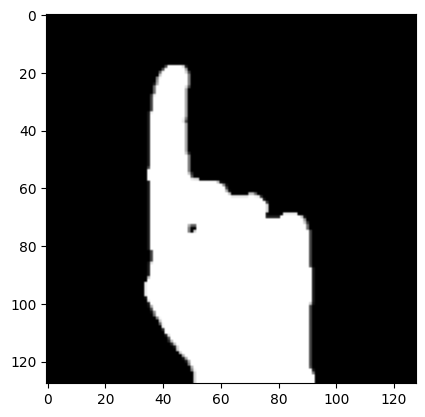

In [8]:
import matplotlib.pyplot as plt
plt.imshow(images[10],cmap='gray')

In [9]:
int(image_paths[10].split('_')[1].split('.')[0])

1

In [10]:
X=np.array(images)
X = X.reshape(-1, 128, 128, 3)
Y=[int(image_paths[i].split('_')[1].split('.')[0]) for i in range(len(X))]
Y=np.array(Y)

In [11]:
X.shape

(4002, 128, 128, 3)

In [12]:
Y.shape

(4002,)

In [13]:
X=X/255

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=404)

In [15]:
import keras
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

2024-08-20 14:14:30.156602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 14:14:30.156707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 14:14:30.278108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
#we have 6 calasses that's why we will use 6 units in the output layer
np.unique(Y)

array([0, 1, 2, 3, 4, 5])

In [17]:
model=keras.Sequential([
    Conv2D(input_shape=(128,128,3),kernel_size=(3,3),filters=10,activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(kernel_size=(3,3),filters=10,activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=224,activation='relu'),
    Dense(units=6,activation='softmax')

])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │     2,016,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,018,764 (7.70 MB)

 Trainable params: 2,018,764 (7.70 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(X,Y,batch_size=32,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
 26/126 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1866 - loss: 1.9829

I0000 00:00:1724163288.032264      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724163288.053342      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1690 - loss: 1.8602

W0000 00:00:1724163290.265046      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724163291.256413      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.1690 - loss: 1.8598 - val_accuracy: 0.1885 - val_loss: 1.7869
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2054 - loss: 1.7822 - val_accuracy: 0.2497 - val_loss: 1.7711
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2393 - loss: 1.7628 - val_accuracy: 0.3396 - val_loss: 1.6893
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3029 - loss: 1.6897 - val_accuracy: 0.4557 - val_loss: 1.5656
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4146 - loss: 1.5389 - val_accuracy: 0.5518 - val_loss: 1.3335
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5168 - loss: 1.3077 - val_accuracy: 0.6891 - val_loss: 1.0226
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6704 - loss: 0.9870 - val_accuracy: 0.7740 - val_loss: 0.7348
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8108 - loss: 0.6516 - val_accuracy: 0.9226 - val

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
model.save('/kaggle/working/model.h5')

15/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

W0000 00:00:1724163315.673082      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [21]:
print(confusion_matrix(y_test,y_pred))

[[153   0   0   0   0   0]
 [  0 121   0   0   0   0]
 [  0   0 128   0   0   0]
 [  0   0   0 141   0   0]
 [  0   0   0   0 131   0]
 [  0   0   0   0   0 127]]
